# Coursera Capstone Project - Clustering - Andrea Tamburri

## Scraping using Scrapy

### NB. It takes some time in order to install folium package, if you have it already installed you can comment and skip that part

In [2]:
!pip install scrapy
!conda install -c conda-forge folium --yes
!conda install -c conda-forge geopy --yes 

     |████████████████████████████████| 245kB 11.8MB/s eta 0:00:01
     |████████████████████████████████| 235kB 20.2MB/s eta 0:00:01
     |████████████████████████████████| 3.1MB 26.4MB/s eta 0:00:01
     |████████████████████████████████| 3.2MB 52.1MB/s eta 0:00:01
     |████████████████████████████████| 61kB 32.1MB/s eta 0:00:01
     |████████████████████████████████| 163kB 59.7MB/s eta 0:00:01
     |████████████████████████████████| 81kB 29.3MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/88/99/96/cfef6665f9cb1522ee6757ae5955feedf2fe25f1737f91fa7f
  Stored in directory: /home/dsxuser/.cache/pip/wheels/51/01/d1/4a2286a976dccd025ba679acacfe37320540df0f2283ecab12
Successfully built PyDispatcher protego
  Found existing installation: attrs 18.2.0
    Uninstalling attrs-18.2.0:
      Successfully uninstalled attrs-18.2.0
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The fo

In [3]:
import numpy as np
import pandas as pd

import scrapy
from scrapy.crawler import CrawlerProcess
from scrapy import Selector

#libraries to interact with API and scrape
import requests
import json


import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage + metrics for elbow evaluation
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist


print('Libraries imported.')

Libraries imported.


### In order to exploit scrapy, I'll build a spider class to exctract all the text files from the Wikipedia's table 

##### This consists of two main parts:
##### - start_requests, in which I'll put the desired url
##### - parse, in which I define what has to be parsed and how. In this case I'll parse the text of the unique table of the page, calling the xpath method. Them I'll apply some data preprocessing, in order to finally have a list of tuples in which each element is one of the three columns

In [4]:
# url of the wiki page
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

#definition of the spider class
class WikiSpider(scrapy.Spider):
  name = 'wikispider'
  # start_requests method
  def start_requests( self ):
    yield scrapy.Request(url = url, callback=self.parse)
      
  def parse(self, response):
    # My version of the parser in which I ask for the text of the table and then, once extracted, I do some data preprocessing
    raw_wiki_data = response.xpath('//table/tbody/tr/td/p//text()').extract()
    wiki_data = []   #first preprocessed list of lists, each containing information about postal code borough and neighborhood
    tmp = []
    for w in raw_wiki_data:
        if w!='\n' :
            if (' / ') not in w :
                if ('(') not in w:
                    if (')') not in w:
                        if (',') not in w:
                            tmp.append(w)
        else:
            wiki_data.append(tmp)
            tmp=[]
    
    postal_code = []
    borough = []
    neigh = []
 #second part of preprocessing, in order to create a unique string of every neighborhood of each Borough, separetd by a ','   
    for d in wiki_data:
        postal_code.append(d[0])
        borough.append(d[1])
        neigh.append(', '.join(d[2:]))

    for z in zip(postal_code, borough, neigh):
        wiki_table.append(z)

#prior definition of the final list that the spider will output
wiki_table=[]

        
# Run the Spider
process = CrawlerProcess()
process.crawl(WikiSpider)
process.start()

print(wiki_table)


2020-03-21 10:43:06 [scrapy.utils.log] INFO: Scrapy 2.0.1 started (bot: scrapybot)
2020-03-21 10:43:06 [scrapy.utils.log] INFO: Versions: lxml 4.3.1.0, libxml2 2.9.9, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 20.3.0, Python 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) - [GCC 7.3.0], pyOpenSSL 19.0.0 (OpenSSL 1.1.1d  10 Sep 2019), cryptography 2.5, Platform Linux-4.4.0-173-generic-x86_64-with-centos-7.6.1810-Core
2020-03-21 10:43:06 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.epollreactor.EPollReactor
2020-03-21 10:43:06 [scrapy.crawler] INFO: Overridden settings:
{}
2020-03-21 10:43:06 [scrapy.extensions.telnet] INFO: Telnet Password: 0f20a443bdf5d8af
2020-03-21 10:43:06 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2020-03-21 10:43:06 [scrapy.middleware] INFO: Enabled downloader middl

[('M1A', 'Not assigned', ''), ('M2A', 'Not assigned', ''), ('M3A', 'North York', 'Parkwoods'), ('M4A', 'North York', 'Victoria Village'), ('M5A', 'Downtown Toronto', 'Regent Park, Harbourfront'), ('M6A', 'North York', 'Lawrence Manor, Lawrence Heights'), ('M7A', "Queen's Park", 'Ontario Provincial Government'), ('M8A', 'Not assigned', ''), ('M9A', 'Etobicoke', 'Islington Avenue'), ('M1B', 'Scarborough', 'Malvern, Rouge'), ('M2B', 'Not assigned', ''), ('M3B', 'North York', 'Don Mills, North'), ('M4B', 'East York', 'Parkview Hill, Woodbine Gardens'), ('M5B', 'Downtown Toronto', 'Garden District, Ryerson'), ('M6B', 'North York', ''), ('M7B', 'Not assigned', ''), ('M8B', 'Not assigned', ''), ('M9B', 'Etobicoke', 'West Deane Park, Princess Gardens, Martin Grove, Islington'), ('M1C', 'Scarborough', 'Rouge Hill, Port Union, Highland Creek'), ('M2C', 'Not assigned', ''), ('M3C', 'North York', 'Don Mills, South, Flemingdon Park'), ('M4C', 'East York', 'Woodbine Heights'), ('M5C', 'Downtown Toro

##### Final preprocessing: from a list of tuples to a DataFrame containing all the Borough of which we have info with the Neighborhood in a unique cell

In [5]:
#Final preprocessing in which I create the Dataframe with the desired column names, dropping the rows in which we don't have info about borough and adding info about missing Neighborhood (as asked in the assigment)
colnames = ['Postal Code', 'Borough', 'Neighborhood']
df_wiki = pd.DataFrame(wiki_table,columns=colnames)
df_wiki = df_wiki[df_wiki.Borough != "Not assigned"]
for index,row in df_wiki.iterrows():
    if df_wiki.loc[index,'Neighborhood',] == "Not assigned" or df_wiki.loc[index,'Neighborhood'] == '':
        df_wiki.loc[index,'Neighborhood'] = df_wiki.loc[index,'Borough']
        
print(df_wiki)

    Postal Code           Borough  \
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
5           M6A        North York   
6           M7A      Queen's Park   
8           M9A         Etobicoke   
9           M1B       Scarborough   
11          M3B        North York   
12          M4B         East York   
13          M5B  Downtown Toronto   
14          M6B        North York   
17          M9B         Etobicoke   
18          M1C       Scarborough   
20          M3C        North York   
21          M4C         East York   
22          M5C  Downtown Toronto   
23          M6C              York   
26          M9C         Etobicoke   
27          M1E       Scarborough   
30          M4E      East Toronto   
31          M5E  Downtown Toronto   
32          M6E              York   
36          M1G       Scarborough   
39          M4G         East York   
40          M5G  Downtown Toronto   
41          M6G  Downtown Toronto   
4

In [6]:
df_wiki.shape

(103, 3)

## Part 2- Adding Geocode cordinates location

In [7]:
!pip install geocoder

     |████████████████████████████████| 102kB 7.3MB/s ta 0:00:011


### I'll use the script written down in the assigment, modified in order to take avery postal code scraped from Wikipedia

In [8]:
import geocoder # import geocoder

# inizialization of a dict of None coordinates, one for each Postal Code
lat_lng_coords = {}
for postal_code in df_wiki['Postal Code']:
    lat_lng_coords[postal_code] = None


# loop until you get the coordinates
for postal_code in df_wiki['Postal Code']:
    while(lat_lng_coords[postal_code] is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code)) #arcgis instead of google because it wan't working
        lat_lng_coords[postal_code] = g.latlng

print(lat_lng_coords)

2020-03-21 10:43:10 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): geocode.arcgis.com:443
2020-03-21 10:43:10 [urllib3.connectionpool] DEBUG: https://geocode.arcgis.com:443 "GET /arcgis/rest/services/World/GeocodeServer/find?f=json&text=M3A%2C+Toronto%2C+Ontario&maxLocations=1 HTTP/1.1" 200 222
2020-03-21 10:43:10 [geocoder.base] INFO: Requested https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find?f=json&text=M3A%2C+Toronto%2C+Ontario&maxLocations=1
2020-03-21 10:43:10 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): geocode.arcgis.com:443
2020-03-21 10:43:11 [urllib3.connectionpool] DEBUG: https://geocode.arcgis.com:443 "GET /arcgis/rest/services/World/GeocodeServer/find?f=json&text=M4A%2C+Toronto%2C+Ontario&maxLocations=1 HTTP/1.1" 200 225
2020-03-21 10:43:11 [geocoder.base] INFO: Requested https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find?f=json&text=M4A%2C+Toronto%2C+Ontario&maxLocations=1
2020-03-21 1

{'M3A': [43.75242000000003, -79.32924245299995], 'M4A': [43.73060024600005, -79.31326499999994], 'M5A': [43.65029500000003, -79.35916572299999], 'M6A': [43.72327000000007, -79.45128601699997], 'M7A': [43.66115033500006, -79.39171499999998], 'M9A': [43.66229908300005, -79.52819499999998], 'M1B': [43.811525000000074, -79.19551746399998], 'M3B': [43.749055000000055, -79.36222672499997], 'M4B': [43.707535000000064, -79.31177329699995], 'M5B': [43.65736301100003, -79.37817999999999], 'M6B': [43.70799000000005, -79.44836733199998], 'M9B': [43.65034698100004, -79.55503999999996], 'M1C': [43.78566500000005, -79.15872457299997], 'M3C': [43.72142500000007, -79.34345422799998], 'M4C': [43.689640000000054, -79.30687387799998], 'M5C': [43.65121000000005, -79.37548057699996], 'M6C': [43.69210517800008, -79.43035499999996], 'M9C': [43.648573449000025, -79.57824999999997], 'M1E': [43.76581500000003, -79.17519294699997], 'M4E': [43.67653121600006, -79.29542499999997], 'M5E': [43.64516015600003, -79.373

### Preprocessing of the dictionary, turned into a DataFrame, in order to finally merge (aka inner join) with the previous one

In [9]:
colnames = ['Postal Code', 'Latitude', 'Longitude']
df_coords = pd.DataFrame(lat_lng_coords)
df_coords = df_coords.transpose()
df_coords.reset_index(inplace = True)
df_coords.columns = colnames
print(df_coords)

    Postal Code   Latitude  Longitude
0           M3A  43.752420 -79.329242
1           M4A  43.730600 -79.313265
2           M5A  43.650295 -79.359166
3           M6A  43.723270 -79.451286
4           M7A  43.661150 -79.391715
5           M9A  43.662299 -79.528195
6           M1B  43.811525 -79.195517
7           M3B  43.749055 -79.362227
8           M4B  43.707535 -79.311773
9           M5B  43.657363 -79.378180
10          M6B  43.707990 -79.448367
11          M9B  43.650347 -79.555040
12          M1C  43.785665 -79.158725
13          M3C  43.721425 -79.343454
14          M4C  43.689640 -79.306874
15          M5C  43.651210 -79.375481
16          M6C  43.692105 -79.430355
17          M9C  43.648573 -79.578250
18          M1E  43.765815 -79.175193
19          M4E  43.676531 -79.295425
20          M5E  43.645160 -79.373675
21          M6E  43.688640 -79.451018
22          M1G  43.768369 -79.217590
23          M4G  43.709495 -79.363989
24          M5G  43.656091 -79.384930
25          

In [10]:
# the final dataframe, obtained joining the scraped one with the one with coordinates through Postal Code key
df_toronto = pd.merge(left=df_wiki, right=df_coords, left_on='Postal Code', right_on='Postal Code')
print(df_toronto)

    Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A      Queen's Park   
5           M9A         Etobicoke   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
2

### NB. Since we opbtained coordinates for each Borough (that, in the most of the cases consists in just one neighborhood), and since we use coordinates to explore the foursquare API, I'll use Borough instead of neighborhood for querying Foursquare API and cluster the dataset

In [11]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

2020-03-21 10:44:09 [geopy] DEBUG: Nominatim.geocode: https://nominatim.openstreetmap.org/search?q=Toronto%2C+Ontario&format=json&limit=1


The geograpical coordinate of Toronto are 43.653963, -79.387207.


### Now we'll define two functons (as in the lab) in order to extract data from Foursquare API

In [12]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [15]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
            
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, -
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
CLIENT_ID='S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO'
CLIENT_SECRET='LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3'
VERSION='20180323'
LIMIT = 200
toronto_venues = getNearbyVenues(names=df_toronto['Borough'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude'],
                                   radius = 500
                                  )

2020-03-21 11:01:49 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


North York


2020-03-21 11:01:50 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.75242000000003,-79.32924245299995&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:50 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:01:50 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.73060024600005,-79.31326499999994&radius=500&limit=200 HTTP/1.1" 200 None


North York
Downtown Toronto


2020-03-21 11:01:50 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:01:50 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.65029500000003,-79.35916572299999&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:50 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


North York


2020-03-21 11:01:50 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.72327000000007,-79.45128601699997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:51 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Queen's Park


2020-03-21 11:01:51 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.66115033500006,-79.39171499999998&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:51 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Etobicoke


2020-03-21 11:01:51 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.66229908300005,-79.52819499999998&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:51 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:01:51 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.811525000000074,-79.19551746399998&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:51 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Scarborough
North York


2020-03-21 11:01:52 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.749055000000055,-79.36222672499997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:52 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


East York


2020-03-21 11:01:52 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.707535000000064,-79.31177329699995&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:52 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Downtown Toronto


2020-03-21 11:01:53 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.65736301100003,-79.37817999999999&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:53 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


North York


2020-03-21 11:01:53 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.70799000000005,-79.44836733199998&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:53 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:01:53 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.65034698100004,-79.55503999999996&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:53 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Etobicoke
Scarborough


2020-03-21 11:01:53 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.78566500000005,-79.15872457299997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:54 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


North York


2020-03-21 11:01:54 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.72142500000007,-79.34345422799998&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:54 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


East York


2020-03-21 11:01:54 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.689640000000054,-79.30687387799998&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:54 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Downtown Toronto


2020-03-21 11:01:54 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.65121000000005,-79.37548057699996&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:55 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


York


2020-03-21 11:01:55 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.69210517800008,-79.43035499999996&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:55 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:01:55 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.648573449000025,-79.57824999999997&radius=500&limit=200 HTTP/1.1" 200 None


Etobicoke


2020-03-21 11:01:55 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Scarborough


2020-03-21 11:01:55 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.76581500000003,-79.17519294699997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:55 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:01:55 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.67653121600006,-79.29542499999997&radius=500&limit=200 HTTP/1.1" 200 None


East Toronto
Downtown Toronto


2020-03-21 11:01:55 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:01:56 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.64516015600003,-79.37367499999993&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:56 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


York


2020-03-21 11:01:56 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.68864000000008,-79.45101761399997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:56 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Scarborough


2020-03-21 11:01:56 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.768369121000035,-79.21758999999997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:56 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


East York


2020-03-21 11:01:57 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.70949500000006,-79.36398897099997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:57 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Downtown Toronto


2020-03-21 11:01:57 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.65609081300005,-79.38492999999994&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:57 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Downtown Toronto


2020-03-21 11:01:57 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.66878132800008,-79.42070999999999&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:57 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:01:58 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.76968799900004,-79.23943999999995&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:58 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Scarborough
North York


2020-03-21 11:01:58 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.80284500000005,-79.35620744999994&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:58 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:01:58 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.75787500000007,-79.44868764799998&radius=500&limit=200 HTTP/1.1" 200 None


North York


2020-03-21 11:01:58 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


East York


2020-03-21 11:01:58 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.70124000000004,-79.34982482599997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:58 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Downtown Toronto


2020-03-21 11:01:59 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.64970000000005,-79.38258157399997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:59 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


West Toronto


2020-03-21 11:01:59 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.66508694300006,-79.43870499999997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:59 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Scarborough


2020-03-21 11:01:59 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.74312500000008,-79.23174973599998&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:01:59 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


North York


2020-03-21 11:02:00 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.780970000000025,-79.34781328099996&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:00 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


North York


2020-03-21 11:02:00 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.76476500000007,-79.48809440699995&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:00 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


East York


2020-03-21 11:02:00 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.688765344000046,-79.33417499999996&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:00 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:02:00 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.630210000000034,-79.36243320899996&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:00 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Downtown Toronto
West Toronto


2020-03-21 11:02:01 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.64852500000006,-79.41775713399994&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:01 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Scarborough


2020-03-21 11:02:01 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.72627568400003,-79.26362499999993&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:01 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


North York


2020-03-21 11:02:01 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.781015000000025,-79.38052867199997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:01 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


North York


2020-03-21 11:02:01 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.73868500000003,-79.46731999999997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:01 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


East Toronto


2020-03-21 11:02:02 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.68317787500007,-79.35510499999998&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:02 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Downtown Toronto


2020-03-21 11:02:02 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.64710000000008,-79.38153109899997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:02 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


West Toronto


2020-03-21 11:02:03 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.639410000000055,-79.42436201999999&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:03 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:02:03 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.71305350000006,-79.28505499999994&radius=500&limit=200 HTTP/1.1" 200 None


Scarborough


2020-03-21 11:02:03 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:02:03 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.75709511900004,-79.38031999999998&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:03 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


North York
North York


2020-03-21 11:02:03 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.720140111000035,-79.51697999999999&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:03 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


East Toronto


2020-03-21 11:02:04 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.66796500000004,-79.31466717299998&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:04 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Downtown Toronto


2020-03-21 11:02:04 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.64839500000005,-79.37886491099994&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:04 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


North York


2020-03-21 11:02:04 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.71381000000008,-79.48830076899998&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:04 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:02:05 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.75950000000006,-79.55702785699998&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:05 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


North York
Scarborough


2020-03-21 11:02:05 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.724234575000025,-79.22792499999997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:05 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


North York


2020-03-21 11:02:05 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.79147500000005,-79.41360487299994&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:05 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


North York


2020-03-21 11:02:05 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.73369000000008,-79.49674024199999&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:05 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


East Toronto


2020-03-21 11:02:06 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.660628993000046,-79.33485499999995&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:06 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


North York


2020-03-21 11:02:06 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.735460000000046,-79.41914787599995&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:06 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:02:07 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.69453000000004,-79.48448943099999&radius=500&limit=200 HTTP/1.1" 200 None


York


2020-03-21 11:02:07 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


North York


2020-03-21 11:02:07 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.73370500000004,-79.53750768599997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:07 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Scarborough


2020-03-21 11:02:07 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.69677000000007,-79.25996735299998&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:07 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


North York


2020-03-21 11:02:07 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.76816500000007,-79.40741984599998&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:07 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


North York


2020-03-21 11:02:08 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.75537065200007,-79.51958999999994&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:08 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:02:08 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.72842000000003,-79.38713269199997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:08 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Central Toronto
Central Toronto


2020-03-21 11:02:08 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.711941154000044,-79.41911999999996&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:08 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


York


2020-03-21 11:02:08 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.67612500000007,-79.48193234099995&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:08 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:02:08 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.704845000000034,-79.51754601599998&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:08 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


York
Scarborough


2020-03-21 11:02:09 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.759975000000054,-79.26897418299995&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:09 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


North York


2020-03-21 11:02:09 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.74789500000003,-79.39991893899997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:09 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Central Toronto


2020-03-21 11:02:10 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.71275500000007,-79.38851449699996&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:10 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Central Toronto


2020-03-21 11:02:10 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.69478500000008,-79.41440483299994&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:10 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


West Toronto


2020-03-21 11:02:10 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.659935000000075,-79.46301926299998&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:10 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:02:10 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.69650500000006,-79.53025233799997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:10 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Etobicoke
Scarborough


2020-03-21 11:02:11 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.750710464000065,-79.30055999999996&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:11 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:02:11 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.77769500000005,-79.44579657299994&radius=500&limit=200 HTTP/1.1" 200 None


North York


2020-03-21 11:02:11 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Central Toronto


2020-03-21 11:02:11 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.71452278400005,-79.40695999999997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:11 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Central Toronto


2020-03-21 11:02:11 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.674840000000074,-79.40376823999998&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:11 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


West Toronto


2020-03-21 11:02:12 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.64787000000007,-79.44977619099996&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:12 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Mississauga


2020-03-21 11:02:12 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.648690000000045,-79.38543999999996&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:12 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:02:12 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.68681000000004,-79.55728354099995&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:12 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Etobicoke
Scarborough


2020-03-21 11:02:13 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.79394000000008,-79.26797613999997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:13 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Central Toronto


2020-03-21 11:02:13 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.70339500000006,-79.38596360499997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:13 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Downtown Toronto


2020-03-21 11:02:13 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.663110000000074,-79.40180056699995&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:13 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


West Toronto


2020-03-21 11:02:14 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.64962000000003,-79.47614085899994&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:14 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Scarborough


2020-03-21 11:02:14 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.78472500000004,-79.29906603299997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:14 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Central Toronto


2020-03-21 11:02:14 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.69068500000003,-79.38294574299994&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:14 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Downtown Toronto


2020-03-21 11:02:14 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.653530000000046,-79.39723268299997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:15 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:02:15 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.81768500000004,-79.28018721399997&radius=500&limit=200 HTTP/1.1" 200 None


Scarborough
Central Toronto


2020-03-21 11:02:15 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:02:15 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.68607377100005,-79.40226499999994&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:15 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Downtown Toronto


2020-03-21 11:02:15 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.64081500000003,-79.39953781899999&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:15 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Etobicoke


2020-03-21 11:02:16 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.61220000000003,-79.49514569099995&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:16 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Etobicoke


2020-03-21 11:02:16 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.74314500000003,-79.58466389699998&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:16 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Scarborough


2020-03-21 11:02:16 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.80088292800008,-79.32073999999994&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:16 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Downtown Toronto


2020-03-21 11:02:16 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.68220500000007,-79.37794519699997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:16 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Downtown Toronto


2020-03-21 11:02:17 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.648690000000045,-79.38543999999996&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:17 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Etobicoke


2020-03-21 11:02:17 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.60113082100003,-79.53878499999996&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:17 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Etobicoke


2020-03-21 11:02:17 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.71174000000008,-79.57918134599998&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:17 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:02:17 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.83421500000003,-79.21670085099998&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:17 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Scarborough
Downtown Toronto


2020-03-21 11:02:18 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.66816000000006,-79.36660236199998&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:18 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Downtown Toronto


2020-03-21 11:02:18 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.64828000000006,-79.38146082599997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:18 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443
2020-03-21 11:02:18 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.653760000000034,-79.51089004199997&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:18 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Etobicoke
Downtown Toronto


2020-03-21 11:02:19 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.666585000000055,-79.38130203699995&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:19 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


East Toronto


2020-03-21 11:02:19 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.648690000000045,-79.38543999999996&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:19 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Etobicoke


2020-03-21 11:02:20 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.63283500000006,-79.48955044599995&radius=500&limit=200 HTTP/1.1" 200 None
2020-03-21 11:02:20 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): api.foursquare.com:443


Etobicoke


2020-03-21 11:02:20 [urllib3.connectionpool] DEBUG: https://api.foursquare.com:443 "GET /v2/venues/explore?&client_id=S0JIXQ4C0JNAMTQACUOATZZ2BFUG3BUNLT23ZQMLRRUG15KO&client_secret=LML20BYLN1TLKRBWMKKNGJS30I2VSAOOKIP1K2PRZLAXNFD3&v=20180323&ll=43.624630000000025,-79.52694976199996&radius=500&limit=200 HTTP/1.1" 200 None


In [30]:
toronto_venues.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Central Toronto,85,85,85,85,85,85
Downtown Toronto,1243,1243,1243,1243,1243,1243
East Toronto,185,185,185,185,185,185
East York,82,82,82,82,82,82
Etobicoke,86,86,86,86,86,86
Mississauga,100,100,100,100,100,100
North York,287,287,287,287,287,287
Queen's Park,49,49,49,49,49,49
Scarborough,95,95,95,95,95,95


## Part 3 - Data preprocessing and Clustering via K-means

### We'll do some preprocessing now, given that K-mean doen't work with catregorical variables; I'll do one hot econding

In [31]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add Borough column back to dataframe
toronto_onehot['Borough'] = toronto_venues['Borough'] 

# move Borough column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]


toronto_grouped = toronto_onehot.groupby('Borough').mean().reset_index()
toronto_grouped
#toronto_onehot

,Borough,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,...,Transportation Service,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Central Toronto,0.000000,0.000000,0.000000,0.000000,0.035294,0.000000,0.000000,0.000000,0.000000,...,0.011765,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Downtown Toronto,0.000000,0.000805,0.000805,0.000000,0.017699,0.000805,0.008850,0.000805,0.002414,...,0.000000,0.009654,0.002414,0.000000,0.005632,0.006436,0.000805,0.001609,0.000000,0.001609
2,East Toronto,0.000000,0.000000,0.000000,0.000000,0.021622,0.005405,0.000000,0.000000,0.016216,...,0.000000,0.010811,0.000000,0.000000,0.005405,0.000000,0.000000,0.000000,0.000000,0.000000
3,East York,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012195
4,Etobicoke,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011628,...,0.000000,0.000000,0.000000,0.011628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Mississauga,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.010000,...,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,North York,0.003484,0.000000,0.000000,0.003484,0.010453,0.000000,0.000000,0.000000,0.006969,...,0.000000,0.000000,0.003484,0.000000,0.010453,0.000000,0.000000,0.000000,0.017422,0.000000
7,Queen's Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Scarborough,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010526,0.000000,0.000000,0.000000,0.000000,0.000000
9,West Toronto,0.000000,0.000000,0.000000,0.000000,0.012245,0.000000,0.008163,0.000000,0.004082,...,0.000000,0.012245,0.000000,0.000000,0.016327,0.012245,0.000000,0.000000,0.000000,0.004082


### Let's see the most frequent venues for each Borough/Neighborhood

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough'] = toronto_grouped['Borough']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,Park,Coffee Shop,Sandwich Place,Café,Pizza Place,Italian Restaurant,American Restaurant,Gym,Dessert Shop,Bus Line
1,Downtown Toronto,Coffee Shop,Café,Restaurant,Hotel,Japanese Restaurant,Italian Restaurant,Bakery,Bar,Seafood Restaurant,American Restaurant
2,East Toronto,Coffee Shop,Pizza Place,Italian Restaurant,Bar,Park,Pub,Sushi Restaurant,Restaurant,Café,Sandwich Place
3,East York,Coffee Shop,Pizza Place,Bank,Breakfast Spot,Bus Line,Sporting Goods Shop,Café,Fast Food Restaurant,Grocery Store,Pet Store
4,Etobicoke,Bank,Grocery Store,Coffee Shop,Pizza Place,Gym,Convenience Store,Burrito Place,Sandwich Place,Park,Pharmacy
5,Mississauga,Coffee Shop,Bar,Restaurant,Hotel,Seafood Restaurant,Pizza Place,Italian Restaurant,Thai Restaurant,Pub,Café
6,North York,Coffee Shop,Clothing Store,Fast Food Restaurant,Park,Pizza Place,Grocery Store,Café,Restaurant,Bank,Pharmacy
7,Queen's Park,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Restaurant,Fried Chicken Joint,Bank,Falafel Restaurant,Portuguese Restaurant,Sushi Restaurant
8,Scarborough,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Park,Bakery,Pharmacy,Grocery Store,Shopping Mall,Pizza Place,Sushi Restaurant
9,West Toronto,Coffee Shop,Café,Restaurant,Bar,Bakery,Park,Furniture / Home Store,Pizza Place,Bank,Italian Restaurant


### K-means clustering of Bourough-neighborhoods

#### Tipically the two most used metrics for evaluating k-means are distorsion and inertia:
#### Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
#### Inertia: It is the sum of squared distances of samples to their closest cluster center

In [34]:
#I'm calculating by hand in order to plot them easily, but I'm wìswhowing the built-in functions as well
toronto_grouped_clustering = toronto_grouped.drop('Borough', 1)
K=10
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {}
mapping = {}
  
for k in range(1,K): 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(toronto_grouped_clustering) 
    kmeanModel.fit(toronto_grouped_clustering)     
      
    distortions.append(sum(np.min(cdist(toronto_grouped_clustering, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / toronto_grouped_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(toronto_grouped_clustering, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / toronto_grouped_clustering.shape[0] 
    mapping2[k] = kmeanModel.inertia_
    mapping[k] = (mapping1[k],mapping2[k])
    
    
for key, metric in mapping.items():
    print('\n')
    print('Distorsion '+str(key)+' : '+str(metric[0]) + '   Inertia '+str(key)+' : '+str(metric[1]))
    



Distorsion 1 : 0.1195262886940155   Inertia 1 : 0.18794744131406416


Distorsion 2 : 0.09385221961137215   Inertia 2 : 0.11418938500187722


Distorsion 3 : 0.07621126312377337   Inertia 3 : 0.08074588804782713


Distorsion 4 : 0.06297351921080997   Inertia 4 : 0.056051618348345676


Distorsion 5 : 0.05050964646382532   Inertia 5 : 0.04058240630329719


Distorsion 6 : 0.040699868177062726   Inertia 6 : 0.029593750862473164


Distorsion 7 : 0.031888845545981565   Inertia 7 : 0.02086493626057058


Distorsion 8 : 0.020010965974867782   Inertia 8 : 0.012329352862664705


Distorsion 9 : 0.014305226232694949   Inertia 9 : 0.006204399975870408


#### As we can see from the plots below, the elbow point it's ambigous, I'll take 4 as "optimal" number of clusters (considering also that there are 11 Borough, all pretty similar)

2020-03-21 11:02:50 [matplotlib.axes._base] DEBUG: update_title_pos
2020-03-21 11:02:50 [matplotlib.axes._base] DEBUG: update_title_pos
2020-03-21 11:02:50 [matplotlib.axes._base] DEBUG: update_title_pos
2020-03-21 11:02:50 [matplotlib.axes._base] DEBUG: update_title_pos
2020-03-21 11:02:50 [matplotlib.axes._base] DEBUG: update_title_pos
2020-03-21 11:02:50 [matplotlib.axes._base] DEBUG: update_title_pos
2020-03-21 11:02:50 [matplotlib.axes._base] DEBUG: update_title_pos
2020-03-21 11:02:50 [matplotlib.axes._base] DEBUG: update_title_pos
2020-03-21 11:02:50 [matplotlib.axes._base] DEBUG: update_title_pos
2020-03-21 11:02:50 [matplotlib.axes._base] DEBUG: update_title_pos
2020-03-21 11:02:50 [matplotlib.axes._base] DEBUG: update_title_pos
2020-03-21 11:02:50 [matplotlib.axes._base] DEBUG: update_title_pos


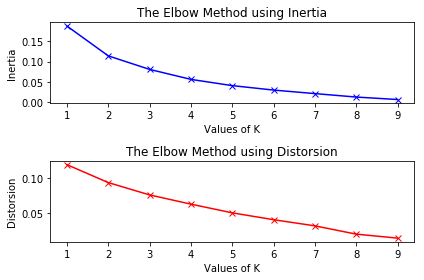

In [35]:

figure, axes = plt.subplots(nrows=2)

axes[0].plot(range(1,K), inertias, 'bx-')
axes[0].set_xlabel('Values of K') 
axes[0].set_ylabel('Inertia') 
axes[0].set_title('The Elbow Method using Inertia') 


axes[1].plot(range(1,K), distortions, 'rx-') 
axes[1].set_xlabel('Values of K') 
axes[1].set_ylabel('Distorsion') 
axes[1].set_title('The Elbow Method using Distorsion') 

figure.tight_layout()
figure.show()

In [36]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 3, 3, 0, 3, 2, 3, 0], dtype=int32)

In [37]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = df_toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Borough'), on='Borough')

toronto_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.752420,-79.329242,3,Coffee Shop,Clothing Store,Fast Food Restaurant,Park,Pizza Place,Grocery Store,Café,Restaurant,Bank,Pharmacy
1,M4A,North York,Victoria Village,43.730600,-79.313265,3,Coffee Shop,Clothing Store,Fast Food Restaurant,Park,Pizza Place,Grocery Store,Café,Restaurant,Bank,Pharmacy
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.650295,-79.359166,0,Coffee Shop,Café,Restaurant,Hotel,Japanese Restaurant,Italian Restaurant,Bakery,Bar,Seafood Restaurant,American Restaurant
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.723270,-79.451286,3,Coffee Shop,Clothing Store,Fast Food Restaurant,Park,Pizza Place,Grocery Store,Café,Restaurant,Bank,Pharmacy
4,M7A,Queen's Park,Ontario Provincial Government,43.661150,-79.391715,2,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Restaurant,Fried Chicken Joint,Bank,Falafel Restaurant,Portuguese Restaurant,Sushi Restaurant


In [38]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Borough'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Now let's see the discriminants of each cluster

In [39]:
toronto_onehot_cluster = toronto_onehot
borough_cluster = toronto_merged[['Borough','Cluster Labels']]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_onehot_cluster = toronto_onehot_cluster.merge(borough_cluster, how='inner', left_on='Borough', right_on='Borough')
toronto_onehot_cluster.drop('Borough',inplace=True,axis=1)
toronto_onehot_cluster.head()

,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Cluster Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [40]:
#Using the same approach as for each borough

toronto_grouped_cluster = toronto_onehot_cluster.groupby('Cluster Labels').mean().reset_index()


# create columns according to number of top venues
columns = ['Cluster Labels']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
clusters_venues_sorted = pd.DataFrame(columns=columns)
clusters_venues_sorted['Cluster Labels'] = toronto_grouped_cluster['Cluster Labels']

for ind in np.arange(toronto_grouped_cluster.shape[0]):
    clusters_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped_cluster.iloc[ind, :], num_top_venues)

clusters_venues_sorted

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Coffee Shop,Café,Restaurant,Hotel,Italian Restaurant,Bakery,Japanese Restaurant,Bar,Seafood Restaurant,American Restaurant
1,1,Park,Brewery,Grocery Store,Convenience Store,Bakery,Fast Food Restaurant,Field,Market,Mexican Restaurant,Café
2,2,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Restaurant,Fried Chicken Joint,Bank,Falafel Restaurant,Portuguese Restaurant,Sushi Restaurant
3,3,Coffee Shop,Clothing Store,Fast Food Restaurant,Pizza Place,Park,Grocery Store,Bank,Pharmacy,Shopping Mall,Convenience Store


### As we can see the clusters seem pretty much Similar. This is just a particular cluster, consisting on the York Area, that is mostly about parks breweries and groceries stores.